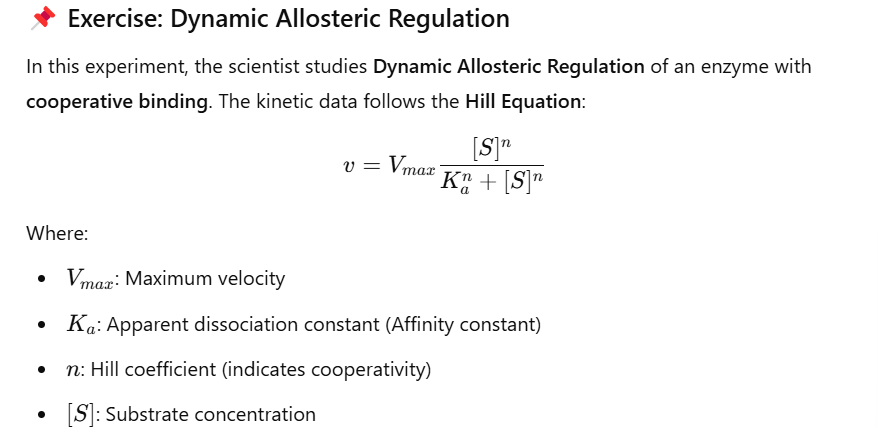
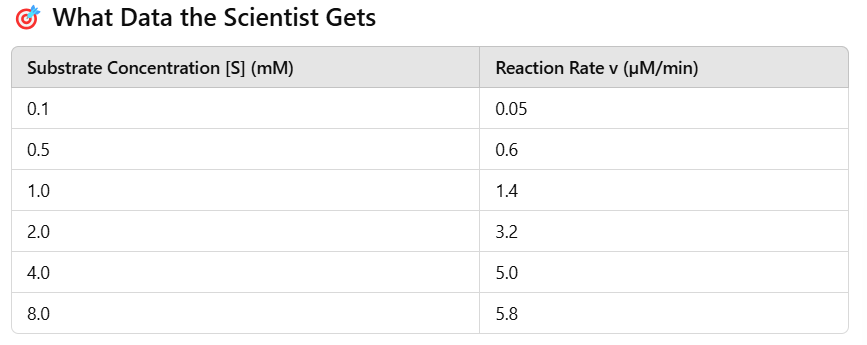
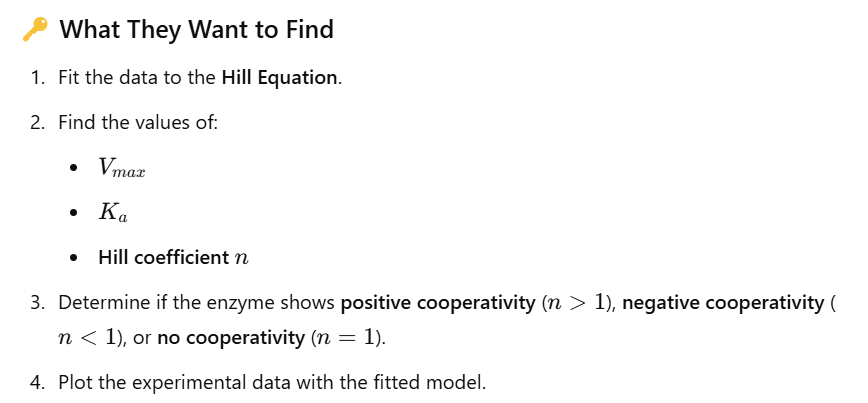

In [9]:
import numpy as np

# Substrate Concentration [S] in mM
S = np.array([0.1, 0.5, 1.0, 2.0, 4.0, 8.0])

# Reaction Rate v in µM/min
v = np.array([0.05, 0.6, 1.4, 3.2, 5.0, 5.8])


In [17]:
from scipy.optimize import curve_fit
def func(S, Vmax, K, n):
    return Vmax*S**n/(np.power(K,n)+np.power(S,n)+1e-10)

popt, _ = curve_fit(func, S,v, p0=(0.5,0.5,1), bounds=([0,0,0.1],[np.inf, np.inf, np.inf]))
Vmax, K, n=popt
print(f'Vmax = {Vmax:.4f}\nKa = {K:.4f}\nn = {n:.4f}')
print(f'n > 1 => the enzyme shows cooperativity')

Vmax = 6.2882
Ka = 1.9459
n = 1.8039
n > 1 => the enzyme shows cooperativity


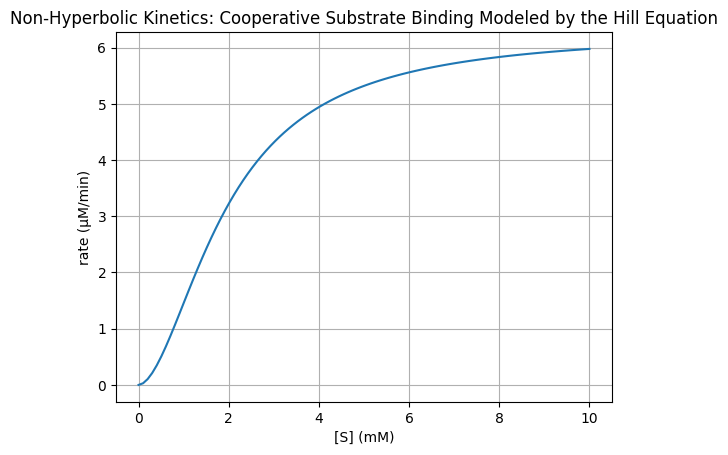

In [22]:
s = np.linspace(0,10,100)
v1 = func(s, Vmax, K, n)
import matplotlib.pyplot as plt
plt.plot(s,v1)
plt.title('Non-Hyperbolic Kinetics: Cooperative Substrate Binding Modeled by the Hill Equation')
plt.ylabel('rate (µM/min)')
plt.xlabel('[S] (mM)')
plt.grid(True)